<a href="https://colab.research.google.com/github/RajivRanganath/DLRL/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def compile_and_train(model):
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True,
    )

    optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[early_stop],
        verbose=1,
    )
    return history

In [3]:
model_1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512, kernel_constraint=keras.constraints.max_norm(3)),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, kernel_constraint=keras.constraints.max_norm(3)),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

In [4]:
model_2 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(256, kernel_constraint=keras.constraints.max_norm(3)),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(128, kernel_constraint=keras.constraints.max_norm(3)),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(64, kernel_constraint=keras.constraints.max_norm(3)),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

In [6]:
history_1 = compile_and_train(model_1)
history_2 = compile_and_train(model_2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9623 - loss: 0.1228 - val_accuracy: 0.9722 - val_loss: 0.0927
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9731 - loss: 0.0881 - val_accuracy: 0.9743 - val_loss: 0.0873
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9785 - loss: 0.0692 - val_accuracy: 0.9755 - val_loss: 0.0812
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9821 - loss: 0.0543 - val_accuracy: 0.9766 - val_loss: 0.0759
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9835 - loss: 0.0492 - val_accuracy: 0.9789 - val_loss: 0.0730
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9868 - loss: 0.0400 - val_accuracy: 0.9803 - val_loss: 0.0717
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9892 - loss: 0.0335 - val_accuracy: 0.9807 - val_loss: 0.0727
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9889 - loss: 0.0316 - val_ac

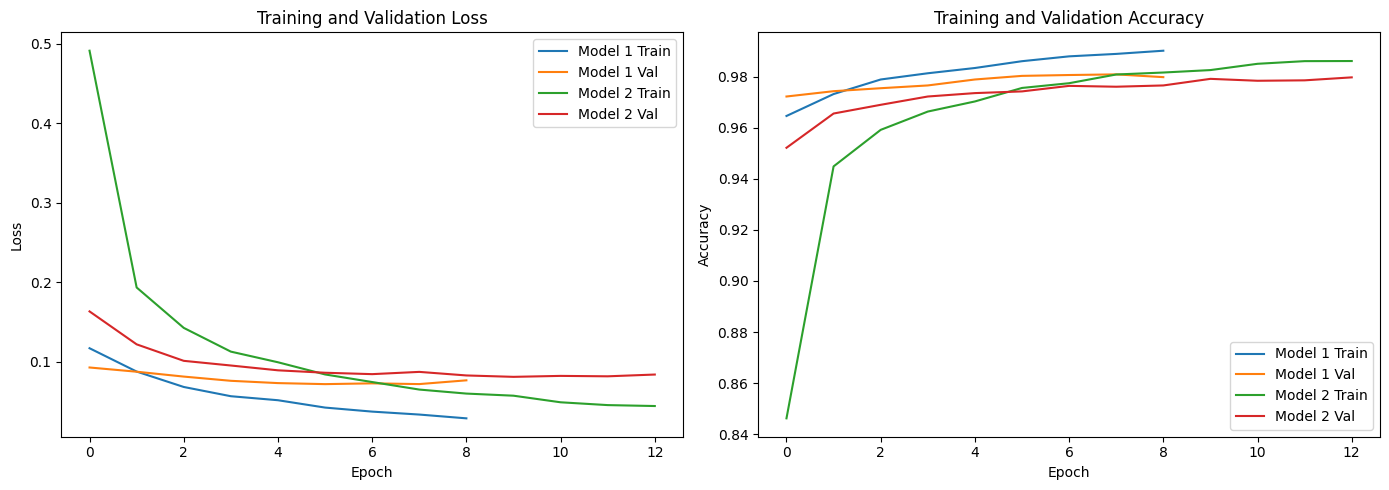

In [10]:
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Val")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Val")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history([history_1, history_2], ["Model 1", "Model 2"])

In [11]:
test_loss_a, test_acc_a = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_b, test_acc_b = model_2.evaluate(test_images, test_labels, verbose=0)

print(f"Model 1 - Test Accuracy: {test_acc_a:.4f}, Test Loss: {test_loss_a:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_b:.4f}, Test Loss: {test_loss_b:.4f}")

Model 1 - Test Accuracy: 0.9828, Test Loss: 0.0613
Model 2 - Test Accuracy: 0.9805, Test Loss: 0.0707


| **Feature**                 | **Model 1**                                        | **Model 2**                         |
| --------------------------- | -------------------------------------------------- | ----------------------------------- |
| **Regularization Type**     | Max-Norm (512, 128 units)                          | Max-Norm (256, 128, 64 units)       |
| **Hidden Layers**           | 2 (512, 128 units)                                 | 3 (256, 128, 64 units)              |
| **Activation Functions**    | ReLU → ReLU → Softmax                              | ReLU → ReLU → ReLU → Softmax        |
| **Dropout Rates**           | 0.3, 0.2                                           | 0.25, 0.25, 0.2                     |
| **Output Activation**       | Softmax                                            | Softmax                             |
| **Loss Function**           | Sparse Categorical Crossentropy                    | Sparse Categorical Crossentropy     |
| **Optimizer**               | Adam (ExponentialDecay LR Schedule)                | Adam (ExponentialDecay LR Schedule) |
| **EarlyStopping Used**      | ✅ Yes (Patience = 3)                               | ✅ Yes (Patience = 3)                |
| **Learning Rate Scheduler** | ✅ Yes (ExponentialDecay)                           | ✅ Yes (ExponentialDecay)            |
| **Regularized Layers**      | All Dense layers (Max-Norm = 3)                    | All Dense layers (Max-Norm = 3)     |
| **Test Accuracy**           | **98.28%**                                         | 98.05%                              |
| **Test Loss**               | 0.0613 (Lower — better generalization in this run) | 0.0707 (Slightly higher loss)       |


Performance Summary

🔹 Model 1 (Max-Norm Regularization)
Test Accuracy: 98.28%

Test Loss: 6.13%

Hidden Layers: 512 → 128

Dropout: 0.3 → 0.2

🔹 Model 2 (Max-Norm Regularization)
Test Accuracy: 98.05%

Test Loss: 7.07%

Hidden Layers: 256 → 128 → 64

Dropout: 0.25 → 0.25 → 0.2


✅ Conclusion:
Both models use ReLU activations, softmax output, Adam optimizer, and exponential LR decay with EarlyStopping.

Model 1 performed better, likely due to simpler architecture and better generalization.